# Imports

In [1]:
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import statsmodels as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data = pd.read_csv('../data/mlb-pitches.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True) 
data.dropna(inplace = True)

font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(data.shape)
data.head(3)

(2777, 76)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,post_away_score,post_home_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bauer_units,is_strike,pitch_count,swing_miss,plate_-x,pfx_-x
626,FF,2021-10-03,93.8,-2.65,6.00,"Hutchison, Drew",660162,571800,double_play,hit_into_play,8.0,Yoan Moncada hit into a fielder's choice doubl...,R,L,R,CWS,DET,X,3.0,ground_ball,3,2,2021,-1.44,16.80,0.01,2.06,683734.0,641313.0,673357.0,1,7,Bot,155.02,162.78,7.113258,-136.437961,-7.597788,-2.931807,26.569740,-13.136268,3.47,1.59,23.0,97.9,-4.0,94.0,2190.0,6.2,632252,54.33,0.317,0.302,0.0,1.0,0.0,0.0,2.0,59,8,4-Seam Fastball,2,2,2,2,Strategic,Standard,197.0,-0.235,-0.924,23.347548,1,3-2,0,-0.01,1.44
1831,SI,2021-10-03,97.7,0.66,6.27,"Ashby, Aaron",608369,676879,single,hit_into_play,5.0,Corey Seager singles on a ground ball to first...,R,L,L,LAD,MIL,X,3.0,ground_ball,0,1,2021,15.96,8.28,0.20,2.52,621035.0,607461.0,605141.0,2,5,Bot,139.27,179.16,-4.208238,-142.121172,-6.102067,19.001374,32.023103,-21.659349,3.55,1.63,2.0,63.6,-53.0,96.1,2012.0,5.3,632242,55.17,0.234,0.211,0.9,1.0,1.0,0.0,2.0,40,2,Sinker,1,1,1,2,Strategic,Standard,138.0,0.139,1.637,20.593654,1,0-1,0,-0.20,-15.96
2008,FF,2021-10-03,94.9,1.88,5.88,"García, Jarlín",624428,606424,out,hit_into_play,4.0,Adam Frazier flies out to left fielder Kris Br...,R,L,L,SF,SD,X,7.0,fly_ball,1,0,2021,16.08,16.92,-0.59,2.62,663757.0,673490.0,571976.0,2,8,Top,68.32,101.03,-9.464913,-137.800121,-5.970944,19.244590,32.089059,-13.047699,3.30,1.50,282.0,86.3,32.0,94.7,2276.0,6.4,632241,54.10,0.029,0.032,0.0,1.0,0.0,0.0,3.0,70,2,4-Seam Fastball,11,4,4,11,Standard,Standard,124.0,0.005,-0.891,23.983140,1,1-0,0,0.59,-16.08


In [3]:
data['pitch_type'] = data['pitch_type'].map({'FS': 8, 'CH': 7, 'KC': 6, 'CU': 5,
                                             'SL': 4, 'FC': 3, 'SI': 2, 'FF': 1})

pitch = data[['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 
              'zone', 'pfx_-x','pfx_z', 'plate_x', 'plate_-x','plate_z', 
              'sz_top', 'sz_bot', 'effective_speed', 'release_spin_rate', 
              'release_extension', 'release_pos_y', 'spin_axis', 'bauer_units']]

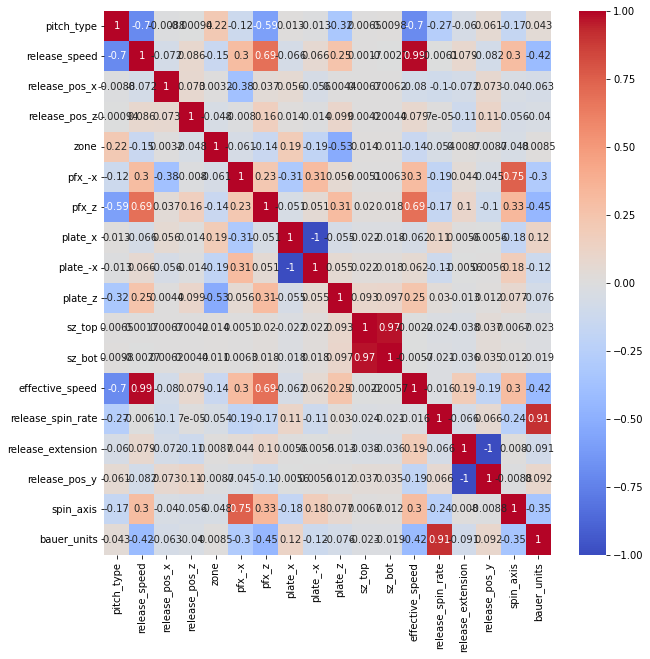

In [4]:
plt.figure(figsize = (10, 10))

sns.heatmap(pitch.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm');

In [5]:
lr = LinearRegression(n_jobs = -1)

X = pitch.drop(columns = ['bauer_units'])
y = pitch['bauer_units']

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

lr.fit(X, y)

print('R2:', lr.score(X, y))
lr.coef_, lr.intercept_

R2: 0.996208621372335


(array([-5.71801385e-02, -1.72354046e-01, -6.71301912e-03,  8.76722863e-03,
        -7.04551711e-04, -1.46701867e-04, -1.44262266e-02, -1.42941108e-02,
         1.42941108e-02,  8.61869738e-03,  7.37394939e-02, -1.48848010e-01,
        -1.29465061e-01,  1.15624391e-02,  9.33635922e-02, -1.23285509e-01,
         8.84451822e-05]),
 32.53717797658751)